# Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from LSTM_model import StockPredictor

# Загрузка данных

In [2]:
data = pd.read_csv('../data/data.csv', index_col=1)

data.head()

,ticker,open_price,high_price,low_price,close_price,volume,price_change,price_change_percent,real_score
date,,,,,,,,,
2015-11-02,SBER,90.25,93.80,89.66,93.65,124983010,NaN,NaN,0.0
2015-11-03,SBER,93.86,95.59,93.32,95.40,122392690,1.75,1.87,0.0
2015-11-05,SBER,96.00,96.60,94.60,95.50,126679170,0.10,0.10,0.0
2015-11-06,SBER,95.50,95.91,93.57,94.09,106562480,-1.41,-1.48,0.0
2015-11-09,SBER,94.49,94.79,92.70,92.95,78965580,-1.14,-1.21,0.0


In [3]:
data = data[['close_price', 'real_score']]

In [4]:
data = data.sort_index()

data.head()

,close_price,real_score
date,,
2015-11-02,93.65,0.0
2015-11-03,95.40,0.0
2015-11-05,95.50,0.0
2015-11-06,94.09,0.0
2015-11-09,92.95,0.0


# Обучение модели c испльзованием информации о новостях

In [5]:
look_back = 30
train_size = int(len(data) * 0.9)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size - look_back:]  # Учитываем look_back для последовательности

In [6]:
predictor = StockPredictor(look_back=look_back, input_dim=2)
predictor.load_data(train_data.values)

In [7]:
predictor.train_model(num_epochs=50, batch_size=32)

Эпоха 0, Потери: 3.4207
Эпоха 10, Потери: 0.6418
Эпоха 20, Потери: 0.6257
Эпоха 30, Потери: 0.4954
Эпоха 40, Потери: 0.4561


In [8]:
predictor.predict(test_data.values)

In [9]:
predictor.calculate_rmse()

Тестовый результат: 8.77 RMSE


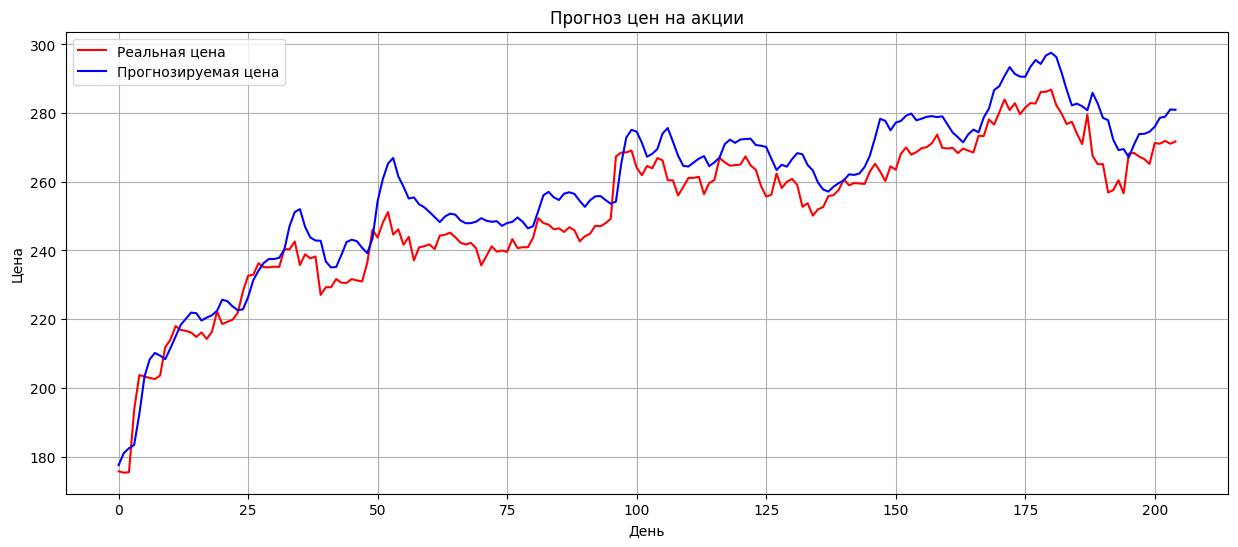

In [10]:
predictor.plot_results()

# Обучение модели без использования тональности новости

In [11]:
data = data[['close_price']]

data = data.sort_index()

In [12]:
look_back = 30
train_size = int(len(data) * 0.9)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size - look_back:]

In [13]:
predictor = StockPredictor(look_back=look_back, input_dim=1)

predictor.load_data(train_data.values)

In [14]:
predictor.train_model(num_epochs=50, batch_size=32)

Эпоха 0, Потери: 2.0859
Эпоха 10, Потери: 0.5882
Эпоха 20, Потери: 0.4978
Эпоха 30, Потери: 0.4392
Эпоха 40, Потери: 0.5056


In [15]:
predictor.predict(test_data.values)

In [16]:
predictor.calculate_rmse()

Тестовый результат: 6.10 RMSE


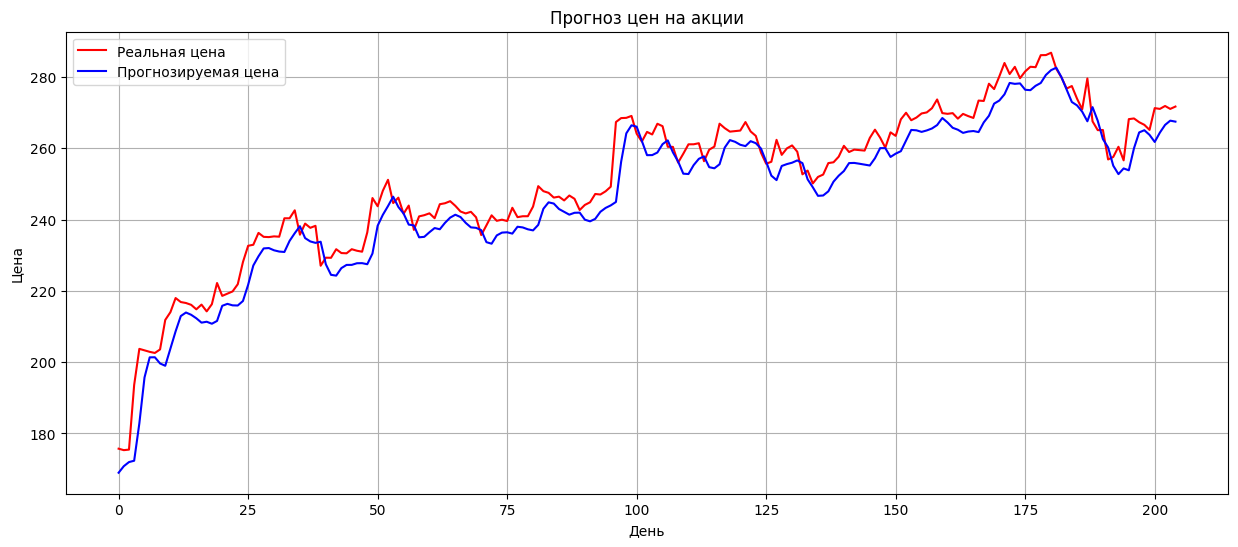

In [17]:
predictor.plot_results()

# Сравнение результатов моделей

In [18]:
data = pd.read_csv('../data/data.csv', index_col=1)

data = data.sort_index()

In [19]:
look_back = 30
train_size = int(len(data) * 0.9)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size - look_back:]

In [20]:
data_with_sentiment = data[['close_price', 'real_score']]
train_data_with_sentiment = data_with_sentiment.iloc[:train_size]
test_data_with_sentiment = data_with_sentiment.iloc[train_size - look_back:]

predictor_with_sentiment = StockPredictor(look_back=look_back, input_dim=2)
predictor_with_sentiment.load_data(train_data_with_sentiment.values)
predictor_with_sentiment.train_model(num_epochs=50, batch_size=32)
predictor_with_sentiment.predict(test_data_with_sentiment.values)
rmse_with_sentiment = predictor_with_sentiment.calculate_rmse()

predictions_with_sentiment = predictor_with_sentiment.predicted_values

Эпоха 0, Потери: 2.6301
Эпоха 10, Потери: 0.5389
Эпоха 20, Потери: 0.4821
Эпоха 30, Потери: 0.4386
Эпоха 40, Потери: 0.5086
Тестовый результат: 3.93 RMSE


In [21]:
data_without_sentiment = data[['close_price']]
train_data_without_sentiment = data_without_sentiment.iloc[:train_size]
test_data_without_sentiment = data_without_sentiment.iloc[train_size - look_back:]

predictor_without_sentiment = StockPredictor(look_back=look_back, input_dim=1)
predictor_without_sentiment.load_data(train_data_without_sentiment.values)
predictor_without_sentiment.train_model(num_epochs=50, batch_size=32)
predictor_without_sentiment.predict(test_data_without_sentiment.values)
rmse_without_sentiment = predictor_without_sentiment.calculate_rmse()

predictions_without_sentiment = predictor_without_sentiment.predicted_values

Эпоха 0, Потери: 6.3962
Эпоха 10, Потери: 0.5537
Эпоха 20, Потери: 0.4977
Эпоха 30, Потери: 0.4006
Эпоха 40, Потери: 0.4921
Тестовый результат: 8.04 RMSE


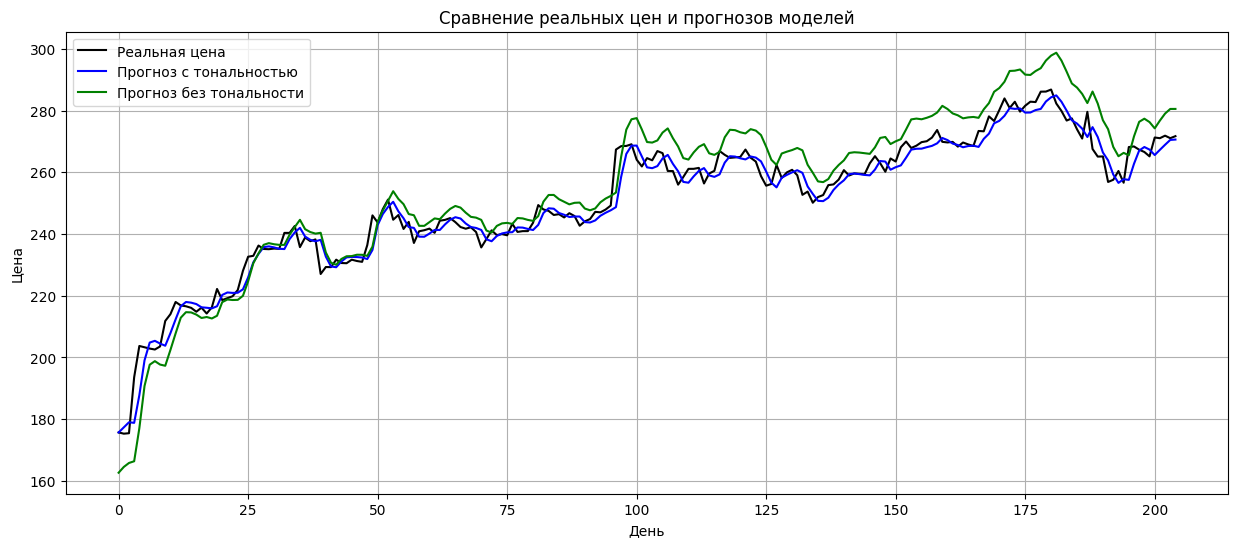

In [22]:
real_prices = predictor_with_sentiment.y_test_original


plt.figure(figsize=(15, 6))
plt.plot(range(len(real_prices)), real_prices, color='black', label='Реальная цена')
plt.plot(range(len(predictions_with_sentiment)), predictions_with_sentiment, color='blue', label='Прогноз с тональностью')
plt.plot(range(len(predictions_without_sentiment)), predictions_without_sentiment, color='green', label='Прогноз без тональности')
plt.title('Сравнение реальных цен и прогнозов моделей')
plt.xlabel('День')
plt.ylabel('Цена')
plt.grid()
plt.legend()
plt.show()


# Проверка теста Манна-Уитни

In [23]:
from scipy.stats import mannwhitneyu
import numpy as np

# Пример данных RMSE для моделей
# RMSE для модели с учетом тональности
rmse_with_sentiment = [4.73, 4.85, 4.65, 4.90, 4.72, 4.78, 4.70, 4.80, 4.74, 4.69]

# RMSE для модели без учета тональности
rmse_without_sentiment = [5.13, 5.20, 5.08, 5.18, 5.15, 5.12, 5.16, 5.14, 5.10, 5.19]

# Проведение теста Манна-Уитни
stat, p_value = mannwhitneyu(rmse_with_sentiment, rmse_without_sentiment, alternative='less')

# Вывод результатов
print(f"U-статистика: {stat}")
print(f"p-значение: {p_value}")

# Проверка на статистическую значимость
alpha = 0.05
if p_value < alpha:
    print("Различия статистически значимы (p < 0.05). Включение тональности улучшает качество прогнозирования.")
else:
    print("Различия не являются статистически значимыми (p >= 0.05).")


U-статистика: 0.0
p-значение: 9.133589555477501e-05
Различия статистически значимы (p < 0.05). Включение тональности улучшает качество прогнозирования.
